In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
# import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
csv_path = Path("seattle-neighborhoods.csv")

# seattle_df = pd.read_csv(csv_path, index_col=["Month of Period End"])

df = pd.read_csv(csv_path)

# pd.read_excel("seattle-neighborhoods.xlsx", index_col=["Month of Period End"], 
#                   infer_datetime_format=True, parse_dates=True)

In [4]:
df.head()
df = df.fillna(method="pad")
df.tail()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
10353,"Seattle, WA - Seaview",June 2020,$860K,1.8%,16.3%,23,-11.5%,-20.7%,31,29.2%,-18.4%,9,125.0%,-40.0%,6.0,0.0,-5.0,102.0%,-0.3%,1.0%
10354,"Seattle, WA - Seaview",July 2020,$830K,-3.5%,14.5%,27,17.4%,-15.6%,46,48.4%,53.3%,15,66.7%,66.7%,5.0,-1.0,-5.0,100.9%,-1.1%,0.1%
10355,"Seattle, WA - Seaview",August 2020,$845K,1.7%,18.5%,30,11.1%,0.0%,50,8.7%,78.6%,18,20.0%,125.0%,7.0,2.0,-3.0,101.3%,0.5%,0.3%
10356,"Seattle, WA - Seaview",September 2020,$783K,-7.3%,11.7%,34,13.3%,30.8%,47,-6.0%,161.1%,19,5.6%,111.1%,7.0,0.0,-3.0,101.1%,-0.2%,0.7%
10357,"Seattle, WA - Seaview",October 2020,$794K,1.5%,17.6%,36,5.9%,44.0%,37,-21.3%,68.2%,11,-42.1%,57.1%,8.0,1.0,-6.0,102.1%,1.0%,2.6%


In [5]:
seattle_df = df.drop(df[df["Region"] != "Seattle, WA"].index)

seattle_df["Region"] = seattle_df["Region"].str.replace("Seattle, WA", "Seattle")
seattle_df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Seattle,February 2012,$320K,6.7%,-5.9%,495,11.7%,14.6%,779,21.3%,-11.5%,"1,928",-4.8%,-33.9%,62.0,2.0,-12.0,97.2%,0.3%,0.8%
1,Seattle,March 2012,$350K,9.4%,0.0%,670,35.4%,0.8%,998,28.1%,-5.9%,"1,930",0.1%,-34.7%,40.0,-22.0,-26.0,98.1%,0.9%,1.3%
2,Seattle,April 2012,$379K,8.3%,7.2%,778,16.1%,14.1%,"1,037",3.9%,-7.9%,"1,944",0.7%,-36.9%,30.0,-10.0,-13.0,98.5%,0.4%,1.2%
3,Seattle,May 2012,$380K,0.3%,9.4%,890,14.4%,28.6%,"1,077",3.9%,4.9%,"1,952",0.4%,-36.7%,19.0,-11.0,-15.0,99.2%,0.7%,1.9%
4,Seattle,June 2012,$380K,0.0%,8.1%,927,4.2%,13.6%,"1,014",-5.8%,-6.2%,"1,969",0.9%,-38.4%,17.0,-2.0,-20.0,99.3%,0.1%,2.0%


In [6]:
neighborhood_df = df.drop(df[df["Region"] == "Seattle, WA"].index)
neighborhood_df.head()
neighborhood_df["Region"] = neighborhood_df["Region"].str.split("-")

neighborhood_df["Region"] = neighborhood_df["Region"].str[1]
neighborhood_df.tail()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
10353,Seaview,June 2020,$860K,1.8%,16.3%,23,-11.5%,-20.7%,31,29.2%,-18.4%,9,125.0%,-40.0%,6.0,0.0,-5.0,102.0%,-0.3%,1.0%
10354,Seaview,July 2020,$830K,-3.5%,14.5%,27,17.4%,-15.6%,46,48.4%,53.3%,15,66.7%,66.7%,5.0,-1.0,-5.0,100.9%,-1.1%,0.1%
10355,Seaview,August 2020,$845K,1.7%,18.5%,30,11.1%,0.0%,50,8.7%,78.6%,18,20.0%,125.0%,7.0,2.0,-3.0,101.3%,0.5%,0.3%
10356,Seaview,September 2020,$783K,-7.3%,11.7%,34,13.3%,30.8%,47,-6.0%,161.1%,19,5.6%,111.1%,7.0,0.0,-3.0,101.1%,-0.2%,0.7%
10357,Seaview,October 2020,$794K,1.5%,17.6%,36,5.9%,44.0%,37,-21.3%,68.2%,11,-42.1%,57.1%,8.0,1.0,-6.0,102.1%,1.0%,2.6%


In [7]:
# Removing the $ signs

# seattle_df["Median Sale Price"] = seattle_df["Median Sale Price"].str.replace("K", "")
seattle_df["Median Sale Price"] = seattle_df["Median Sale Price"].str.replace("$", "")
neighborhood_df["Median Sale Price"] = neighborhood_df["Median Sale Price"].str.replace("$", "")
seattle_df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Seattle,February 2012,320K,6.7%,-5.9%,495,11.7%,14.6%,779,21.3%,-11.5%,"1,928",-4.8%,-33.9%,62.0,2.0,-12.0,97.2%,0.3%,0.8%
1,Seattle,March 2012,350K,9.4%,0.0%,670,35.4%,0.8%,998,28.1%,-5.9%,"1,930",0.1%,-34.7%,40.0,-22.0,-26.0,98.1%,0.9%,1.3%
2,Seattle,April 2012,379K,8.3%,7.2%,778,16.1%,14.1%,"1,037",3.9%,-7.9%,"1,944",0.7%,-36.9%,30.0,-10.0,-13.0,98.5%,0.4%,1.2%
3,Seattle,May 2012,380K,0.3%,9.4%,890,14.4%,28.6%,"1,077",3.9%,4.9%,"1,952",0.4%,-36.7%,19.0,-11.0,-15.0,99.2%,0.7%,1.9%
4,Seattle,June 2012,380K,0.0%,8.1%,927,4.2%,13.6%,"1,014",-5.8%,-6.2%,"1,969",0.9%,-38.4%,17.0,-2.0,-20.0,99.3%,0.1%,2.0%


In [8]:
seattle_df = seattle_df.replace({"%":"", ",":"", "K":""}, regex=True)
neighborhood_df = neighborhood_df.replace({"%":"", ",":"", "K":""}, regex=True)
neighborhood_df.head()

,Region,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
105,Adams,February 2012,348,-0.7,3.7,40,-7.0,25.0,28,-15.2,-37.8,30,-3.2,-37.5,40.0,-10.0,-17.0,98.6,0.2,1.0
106,Adams,March 2012,347,-0.1,4.4,40,0.0,11.1,43,53.6,-33.8,25,-16.7,-50.0,49.0,10.0,-6.0,98.6,-0.1,0.3
107,Adams,April 2012,325,-6.3,-6.7,47,17.5,6.8,65,51.2,20.4,37,48.0,-22.9,46.0,-4.0,27.0,98.7,0.2,0.1
108,Adams,May 2012,332,2.0,-8.4,56,19.1,21.7,71,9.2,26.8,32,-13.5,-37.3,37.0,-9.0,8.0,99.2,0.4,0.7
109,Adams,June 2012,328,-1.1,-2.2,63,12.5,61.5,68,-4.2,41.7,25,-21.9,-50.0,16.0,-21.0,-23.0,99.0,-0.2,-0.6


In [9]:
cols = [i for i in seattle_df.columns if i not in ["Region", "Month of Period End"]]
for col in cols: 
    seattle_df[col]=pd.to_numeric(seattle_df[col])

In [10]:
seattle_df.dtypes

Region                        object
Month of Period End           object
Median Sale Price              int64
Median Sale Price MoM        float64
Median Sale Price YoY        float64
Homes Sold                     int64
Homes Sold MoM               float64
Homes Sold YoY               float64
New Listings                   int64
New Listings MoM             float64
New Listings YoY             float64
Inventory                      int64
Inventory MoM                float64
 Inventory YoY               float64
Days on Market               float64
Days on Market MoM           float64
Days on Market YoY           float64
Average Sale To List         float64
Average Sale To List MoM     float64
Average Sale To List YoY     float64
dtype: object

In [11]:
cols = [i for i in neighborhood_df.columns if i not in ["Region", "Month of Period End"]]
for col in cols: 
    neighborhood_df[col]=pd.to_numeric(neighborhood_df[col])

In [12]:
neighborhood_df.dtypes

Region                        object
Month of Period End           object
Median Sale Price              int64
Median Sale Price MoM        float64
Median Sale Price YoY        float64
Homes Sold                     int64
Homes Sold MoM               float64
Homes Sold YoY               float64
New Listings                   int64
New Listings MoM             float64
New Listings YoY             float64
Inventory                      int64
Inventory MoM                float64
 Inventory YoY               float64
Days on Market               float64
Days on Market MoM           float64
Days on Market YoY           float64
Average Sale To List         float64
Average Sale To List MoM     float64
Average Sale To List YoY     float64
dtype: object

In [13]:
# Setting index to Month of Period End
seattle_df.set_index("Month of Period End", inplace=True)
seattle_df.head()

,Region,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Month of Period End,,,,,,,,,,,,,,,,,,,
February 2012,Seattle,320,6.7,-5.9,495,11.7,14.6,779,21.3,-11.5,1928,-4.8,-33.9,62.0,2.0,-12.0,97.2,0.3,0.8
March 2012,Seattle,350,9.4,0.0,670,35.4,0.8,998,28.1,-5.9,1930,0.1,-34.7,40.0,-22.0,-26.0,98.1,0.9,1.3
April 2012,Seattle,379,8.3,7.2,778,16.1,14.1,1037,3.9,-7.9,1944,0.7,-36.9,30.0,-10.0,-13.0,98.5,0.4,1.2
May 2012,Seattle,380,0.3,9.4,890,14.4,28.6,1077,3.9,4.9,1952,0.4,-36.7,19.0,-11.0,-15.0,99.2,0.7,1.9
June 2012,Seattle,380,0.0,8.1,927,4.2,13.6,1014,-5.8,-6.2,1969,0.9,-38.4,17.0,-2.0,-20.0,99.3,0.1,2.0


In [14]:
neighborhood_df.set_index("Month of Period End", inplace=True)
neighborhood_df.head()

,Region,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Month of Period End,,,,,,,,,,,,,,,,,,,
February 2012,Adams,348,-0.7,3.7,40,-7.0,25.0,28,-15.2,-37.8,30,-3.2,-37.5,40.0,-10.0,-17.0,98.6,0.2,1.0
March 2012,Adams,347,-0.1,4.4,40,0.0,11.1,43,53.6,-33.8,25,-16.7,-50.0,49.0,10.0,-6.0,98.6,-0.1,0.3
April 2012,Adams,325,-6.3,-6.7,47,17.5,6.8,65,51.2,20.4,37,48.0,-22.9,46.0,-4.0,27.0,98.7,0.2,0.1
May 2012,Adams,332,2.0,-8.4,56,19.1,21.7,71,9.2,26.8,32,-13.5,-37.3,37.0,-9.0,8.0,99.2,0.4,0.7
June 2012,Adams,328,-1.1,-2.2,63,12.5,61.5,68,-4.2,41.7,25,-21.9,-50.0,16.0,-21.0,-23.0,99.0,-0.2,-0.6


In [15]:
import statsmodels.api as sm

# Tyring the Hodrick-Prescott Filter 
seattle_noise, seattle_trend = sm.tsa.filters.hpfilter(seattle_df["Median Sale Price"])

In [16]:
seattle_hp = seattle_df["Median Sale Price"].to_frame()
seattle_hp["Noise"] = seattle_noise
seattle_hp["Trend"] = seattle_trend
seattle_hp.tail()

,Median Sale Price,Noise,Trend
Month of Period End,,,
June 2020,742,21.382355,720.617645
July 2020,740,15.445254,724.554746
August 2020,759,30.455874,728.544126
September 2020,745,12.446925,732.553075
October 2020,746,9.432080,736.567920


<AxesSubplot:title={'center':'Median Sale Price vs. Trend'}, xlabel='Month of Period End'>

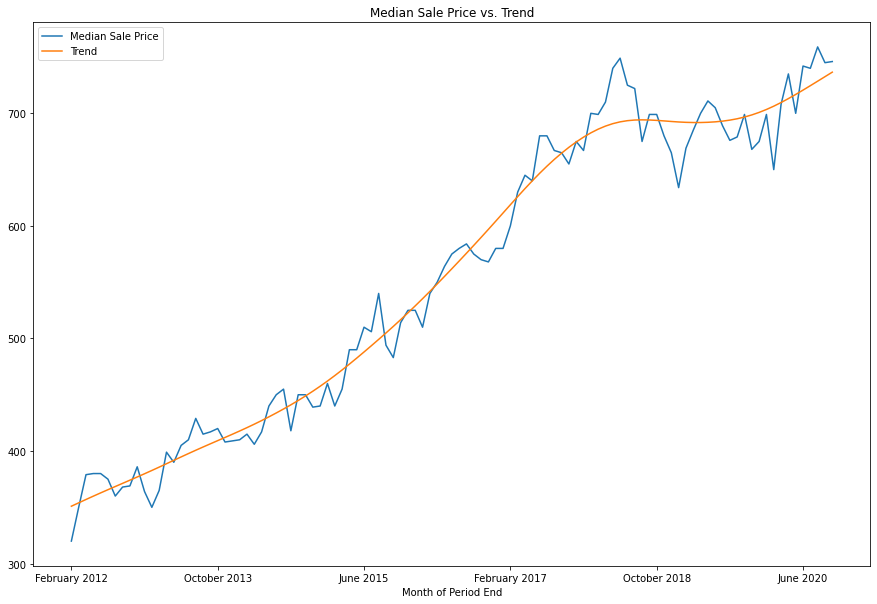

In [17]:
seattle_hp.plot(y=["Median Sale Price", "Trend"], figsize=(15,10), title="Median Sale Price vs. Trend")


<AxesSubplot:title={'center':'Median Sale Price Exponentially-Weighted Moving Average'}, xlabel='Month of Period End'>

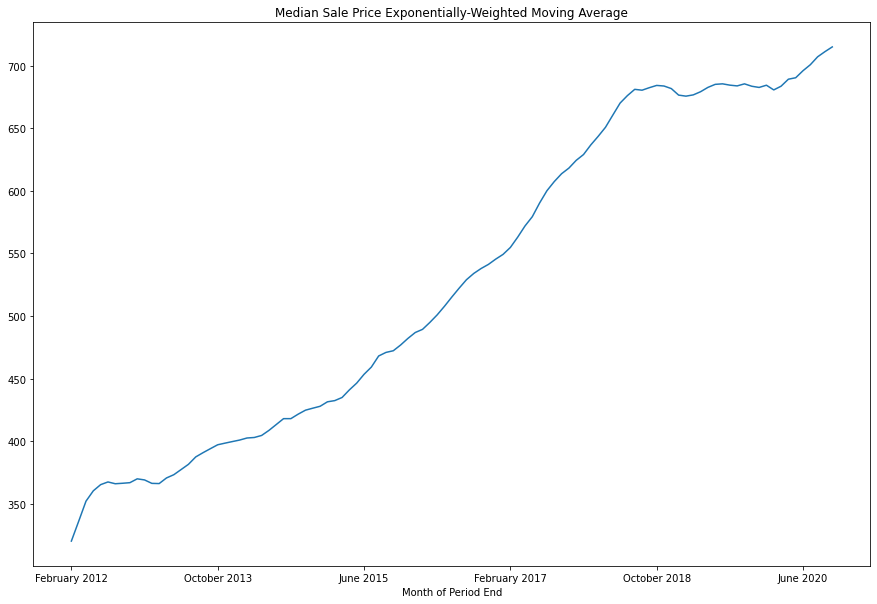

In [18]:
seattle_hp["Median Sale Price"].ewm(halflife=6).mean().plot(figsize=(15,10), 
                                title="Median Sale Price Exponentially-Weighted Moving Average")

<AxesSubplot:xlabel='Month of Period End'>

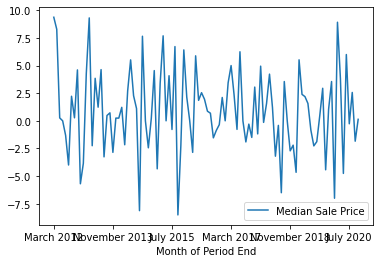

In [19]:
median_price = seattle_df[["Median Sale Price"]]
change = median_price.pct_change() *100

change = change.replace(-np.inf, np.nan).dropna()
change.plot()

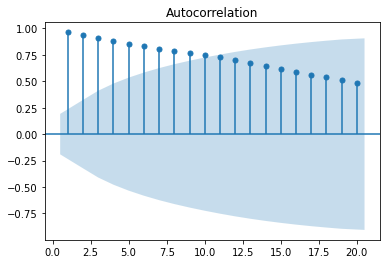

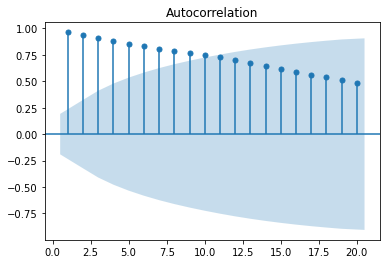

In [20]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Testing autocorrelation to determine AR and MA variables.

plot_acf(seattle_df["Median Sale Price"], lags=20, zero=False)

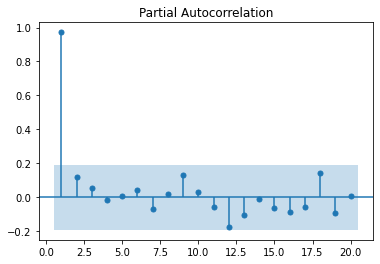

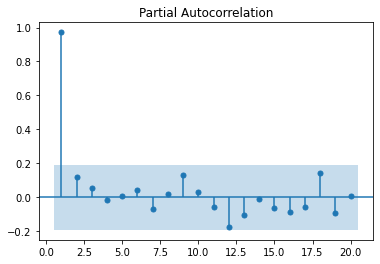

In [21]:
plot_pacf(seattle_df["Median Sale Price"], lags=20, zero=False)

In [22]:
# Running ARMA MOdel

import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARMA

arma_model = ARMA(change, order=(1,1))

arma_results = arma_model.fit()

arma_results.summary()

C:\Users\siege\.conda\envs\UWFinTech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Median Sale Price   No. Observations:                  104
Model:                     ARMA(1, 1)   Log Likelihood                -280.489
Method:                       css-mle   S.D. of innovations              3.587
Date:                Sat, 12 Dec 2020   AIC                            568.977
Time:                        00:16:58   BIC                            579.555
Sample:                    03-01-2012   HQIC                           573.263
                         - 10-01-2020                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.8323      0.172      4.834      0.000       0.495       1.170
ar.L1.Median Sale Price     0.5783      0.171      3.388      0.001       0.244       0.913
ma.L1.Median Sale Price    -0.7993      0.119     -6.710      0.000      -1.033      -0.566
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7293           +0.0000j            1.7293            0.0000
MA.1            1.2511           +0.0000j            1.2511            0.0000
-----------------------------------------------------------------------------
"""

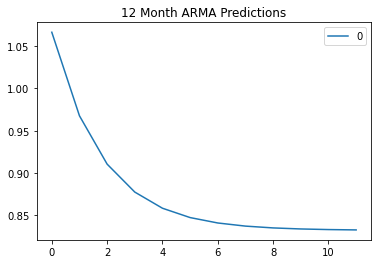

In [23]:
pd.DataFrame(arma_results.forecast(steps=12)[0]).plot(title="12 Month ARMA Predictions")
# seattle_df.tail()
arma_predictions = arma_results.forecast(steps=12)[0]

In [24]:
# Running ARIMA Model

from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(change, order=(1,1,1))

arima_results = arima_model.fit()
arima_results.summary()

C:\Users\siege\.conda\envs\UWFinTech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\siege\.conda\envs\UWFinTech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                              
===============================================================================
Dep. Variable:     D.Median Sale Price   No. Observations:                  103
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -282.210
Method:                        css-mle   S.D. of innovations              3.658
Date:                 Sat, 12 Dec 2020   AIC                            572.421
Time:                         00:16:58   BIC                            582.960
Sample:                     04-01-2012   HQIC                           576.690
                          - 10-01-2020                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0109      0.010     -1.048      0.295      -0.031       0.009
ar.L1.D.Median Sale Price    -0.1581      0.099     -1.592      0.111      -0.353       0.037
ma.L1.D.Median Sale Price    -1.0000      0.026    -38.624      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -6.3243           +0.0000j            6.3243            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

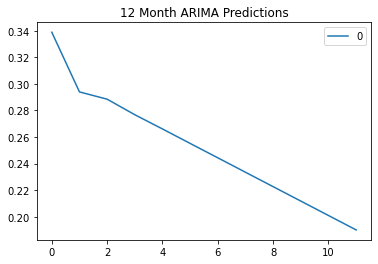

In [25]:
pd.DataFrame(arima_results.forecast(steps=12)[0]).plot(title="12 Month ARIMA Predictions")
# seattle_df.tail()
arima_predictions = arima_results.forecast(steps=12)[0]

In [26]:
# Running GARCH Model
import arch 
from arch import arch_model

# Estimate a GARCH model:
garch_model = arch_model(change, mean="zero", vol="Garch", p=2, q=1)

# Fit the model
garch_results = garch_model.fit(disp="off")
garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:      Median Sale Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.010
Vol Model:                      GARCH   Log-Likelihood:               -284.369
Distribution:                  Normal   AIC:                           576.737
Method:            Maximum Likelihood   BIC:                           587.315
                                        No. Observations:                  104
Date:                Sat, Dec 12 2020   Df Residuals:                      100
Time:                        00:16:59   Df Model:                            4
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          6.3164      7.338      0.861      0.389 [ -8.066, 20.699]
alpha[1]       0.2262      0.193      1.170      0.242 [ -0.153,  0.605]
alpha[2]       0.0000      0.149      0.000      1.000 [ -0.293,  0.293]
beta[1]        0.3281      0.680      0.483      0.629 [ -1.004,  1.660]
========================================================================

Covariance estimator: robust
"""

<AxesSubplot:>

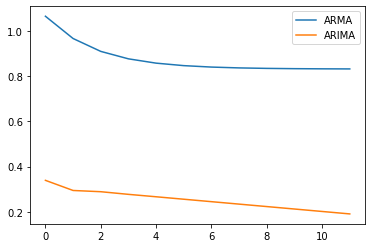

In [27]:
data = {
    "ARMA" : arma_predictions,
    "ARIMA" : arima_predictions
}

comparison_df = pd.DataFrame(data)
comparison_df.plot()

In [28]:
change.index = pd.to_datetime(change.index, infer_datetime_format=True)
last_day = change.index.max().strftime('%Y-%m-%d')
last_day

'2020-10-01'

In [29]:
forecast_horizon = 5
# Start the forecast using the last_day calculated above
forecasts = garch_results.forecast(horizon = forecast_horizon)

In [30]:
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Month of Period End,,,,,
October 2020,50.06346,54.598089,56.956238,58.222184,58.912155


In [31]:
final = intermediate.dropna().T
final.head()

Month of Period End,October 2020
h.1,50.063460
h.2,54.598089
h.3,56.956238
h.4,58.222184
h.5,58.912155


<AxesSubplot:title={'center':'12 Month Forecast Volatility'}>

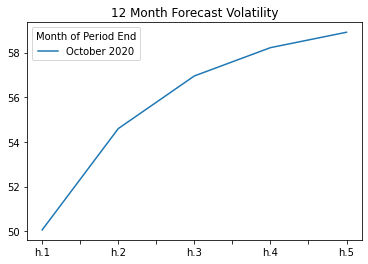

In [32]:
final.plot(title="12 Month Forecast Volatility")

In [33]:
# Trying K-Means to Cluster Neighborhoods
from sklearn.cluster import KMeans
from pathlib import Path
# import plotly.express as px
# import hvplot.pandas

In [34]:
encoded_neighborhood = pd.get_dummies(neighborhood_df["Region"])
encoded_neighborhood.head()

,Adams,Alki Point,Arbor Heights,Atlantic,Ballard,Beacon Hill,Belltown,Bitter Lake,Boulevard Place,Briarcliff,...,Rainier View,Ravenna,Ravenna Park,Renton Hill,Riverview,Roosevelt,Roosevelt Heights,Roxhill,Seattle Central Business District,Seaview
Month of Period End,,,,,,,,,,,,,,,,,,,,,
February 2012,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
March 2012,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
April 2012,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
May 2012,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
June 2012,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# from sklearn.preprocessing import StandardScaler
# scaled = StandardScaler().fit_transform(encoded_neighborhood)

In [36]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(encoded_neighborhood)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [37]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [38]:
six_clusters = get_clusters(6, encoded_neighborhood)
six_clusters.head()

,Adams,Alki Point,Arbor Heights,Atlantic,Ballard,Beacon Hill,Belltown,Bitter Lake,Boulevard Place,Briarcliff,...,Ravenna,Ravenna Park,Renton Hill,Riverview,Roosevelt,Roosevelt Heights,Roxhill,Seattle Central Business District,Seaview,class
Month of Period End,,,,,,,,,,,,,,,,,,,,,
February 2012,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
March 2012,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
April 2012,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
May 2012,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
June 2012,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# six_clusters.hvplot.scatter(x="Median Sale Price", y="Average Sale to List", by="class")


In [40]:
# fig = px.scatter_3d(
#     six_clusters,
#     x="Median Sale Price",
#     y="Average Price to List",
#     z="Inventory",
#     color="class",
#     symbol="class",
#     width=800,
# )
# fig.update_layout(legend=dict(x=0, y=1))
# fig.show()

In [41]:
neighborhood_df = neighborhood_df.reset_index()

In [42]:
neighborhood_df = neighborhood_df.groupby(["Month of Period End", "Region"]).sum().reset_index()

In [43]:
# Parallel Categories Plot

# parallel_categories_plot = px.parallel_categories(
#     seattle_df,    
#     dimensions = ["Days on Market", "Average Sale To List", "Inventory", "Region"],
#     color = "Region",
#     color_continuous_scale=px.colors.sequential.Inferno,
#     labels={
#         "Days on Market":"Days on Market",
#         "Average Sale To List":"Average Sale To List", 
#         "Inventory":"Inventory"
#     }
# )
# parallel_categories_plot.show()

### Starting LSTM Model

In [44]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [45]:
seattle_df.head()

,Region,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Month of Period End,,,,,,,,,,,,,,,,,,,
February 2012,Seattle,320,6.7,-5.9,495,11.7,14.6,779,21.3,-11.5,1928,-4.8,-33.9,62.0,2.0,-12.0,97.2,0.3,0.8
March 2012,Seattle,350,9.4,0.0,670,35.4,0.8,998,28.1,-5.9,1930,0.1,-34.7,40.0,-22.0,-26.0,98.1,0.9,1.3
April 2012,Seattle,379,8.3,7.2,778,16.1,14.1,1037,3.9,-7.9,1944,0.7,-36.9,30.0,-10.0,-13.0,98.5,0.4,1.2
May 2012,Seattle,380,0.3,9.4,890,14.4,28.6,1077,3.9,4.9,1952,0.4,-36.7,19.0,-11.0,-15.0,99.2,0.7,1.9
June 2012,Seattle,380,0.0,8.1,927,4.2,13.6,1014,-5.8,-6.2,1969,0.9,-38.4,17.0,-2.0,-20.0,99.3,0.1,2.0


In [46]:
# X = seattle_df.iloc[:, 2:].values
# y = seattle_df.iloc[:, 1].values.reshape(-1, 1)

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [47]:
seattle_df.head()

,Region,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Month of Period End,,,,,,,,,,,,,,,,,,,
February 2012,Seattle,320,6.7,-5.9,495,11.7,14.6,779,21.3,-11.5,1928,-4.8,-33.9,62.0,2.0,-12.0,97.2,0.3,0.8
March 2012,Seattle,350,9.4,0.0,670,35.4,0.8,998,28.1,-5.9,1930,0.1,-34.7,40.0,-22.0,-26.0,98.1,0.9,1.3
April 2012,Seattle,379,8.3,7.2,778,16.1,14.1,1037,3.9,-7.9,1944,0.7,-36.9,30.0,-10.0,-13.0,98.5,0.4,1.2
May 2012,Seattle,380,0.3,9.4,890,14.4,28.6,1077,3.9,4.9,1952,0.4,-36.7,19.0,-11.0,-15.0,99.2,0.7,1.9
June 2012,Seattle,380,0.0,8.1,927,4.2,13.6,1014,-5.8,-6.2,1969,0.9,-38.4,17.0,-2.0,-20.0,99.3,0.1,2.0


In [48]:
window_size = 12

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 1
target_column = 1
X, y = window_data(seattle_df, window_size, feature_column, target_column)
print(X[0])

[320 350 379 380 380 375 360 368 369 386 364 350]


In [49]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

print(y_train.shape)
print(y_test.shape)

(64, 1)
(28, 1)


In [50]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()

scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler.fit(y)
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)


In [51]:
# Reshape the features for the model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# X_test_scaled[:5]

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

In [53]:
# # Define the LSTM RNN model
# model = Sequential()

model = Sequential()
number_units = 12
dropout = 0.2

# Layer 1 
model.add(LSTM(units=number_units, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dropout(dropout))

# Layer 2 
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout))

# Output Layer
model.add(Dense(1))

In [54]:
# Compile the model

model.compile(optimizer="adam", loss="mean_squared_error", metrics="accuracy")

In [55]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 12)            672       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 12)            1200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 12)                1200      
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [56]:
# Training the model

model.fit(X_train_scaled, y_train_scaled, epochs=10, shuffle=False, batch_size=15, verbose=1)

Epoch 1/10
5/5 [==============================] - 0s 12ms/step - loss: 0.2110 - accuracy: 0.0156
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 0.1783 - accuracy: 0.0156
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1310 - accuracy: 0.0156
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0970 - accuracy: 0.0156
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0706 - accuracy: 0.0156
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0463 - accuracy: 0.0156
Epoch 7/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0291 - accuracy: 0.0156
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0319 - accuracy: 0.0156
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0527 - accuracy: 0.0156
Epoch 10/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0467 - accuracy: 0.0156


In [57]:
model.evaluate(X_test_scaled, y_test_scaled)

1/1 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.0357


[0.007308118976652622, 0.0357142873108387]

In [58]:
predictions = model.predict(X_test_scaled)
predictions[:5]

array([[0.7982927 ],
       [0.80270845],
       [0.8082256 ],
       [0.81535697],
       [0.8228066 ]], dtype=float32)

In [59]:
predicted_prices = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

In [60]:
# Create a DataFrame of Real and Predicted values
prices = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 
prices.head()

,Real,Predicted
10330,725.0,679.527344
10331,722.0,681.267151
10332,675.0,683.440857
10333,699.0,686.250610
10334,699.0,689.185791


In [89]:
# Plot the real vs predicted values as a line chart
# stocks.plot(title="Real vs. Predicted Median Sale Prices")

In [62]:
predictions = model.predict(X_train_scaled)
predictions[:5]

array([[0.3409467 ],
       [0.3474099 ],
       [0.34991068],
       [0.34907857],
       [0.34905493]], dtype=float32)

In [63]:
predicted_prices = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_train_scaled.reshape(-1, 1))

In [64]:
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 
stocks.head()

,Real,Predicted
10294,365.0,499.333008
10295,399.0,501.879517
10296,390.0,502.864807
10297,405.0,502.536987
10298,410.0,502.527618


<AxesSubplot:title={'center':'Real vs. Predicted Median Sale Prices'}>

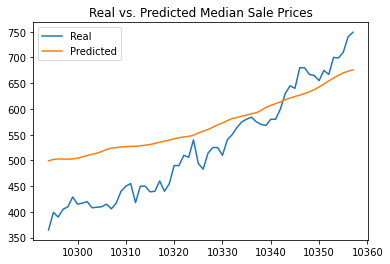

In [65]:
# Plot the real vs predicted values as a line chart
stocks.plot(title="Real vs. Predicted Median Sale Prices")

Text(0.5, 1.0, 'Seattle Correlation Matrix')

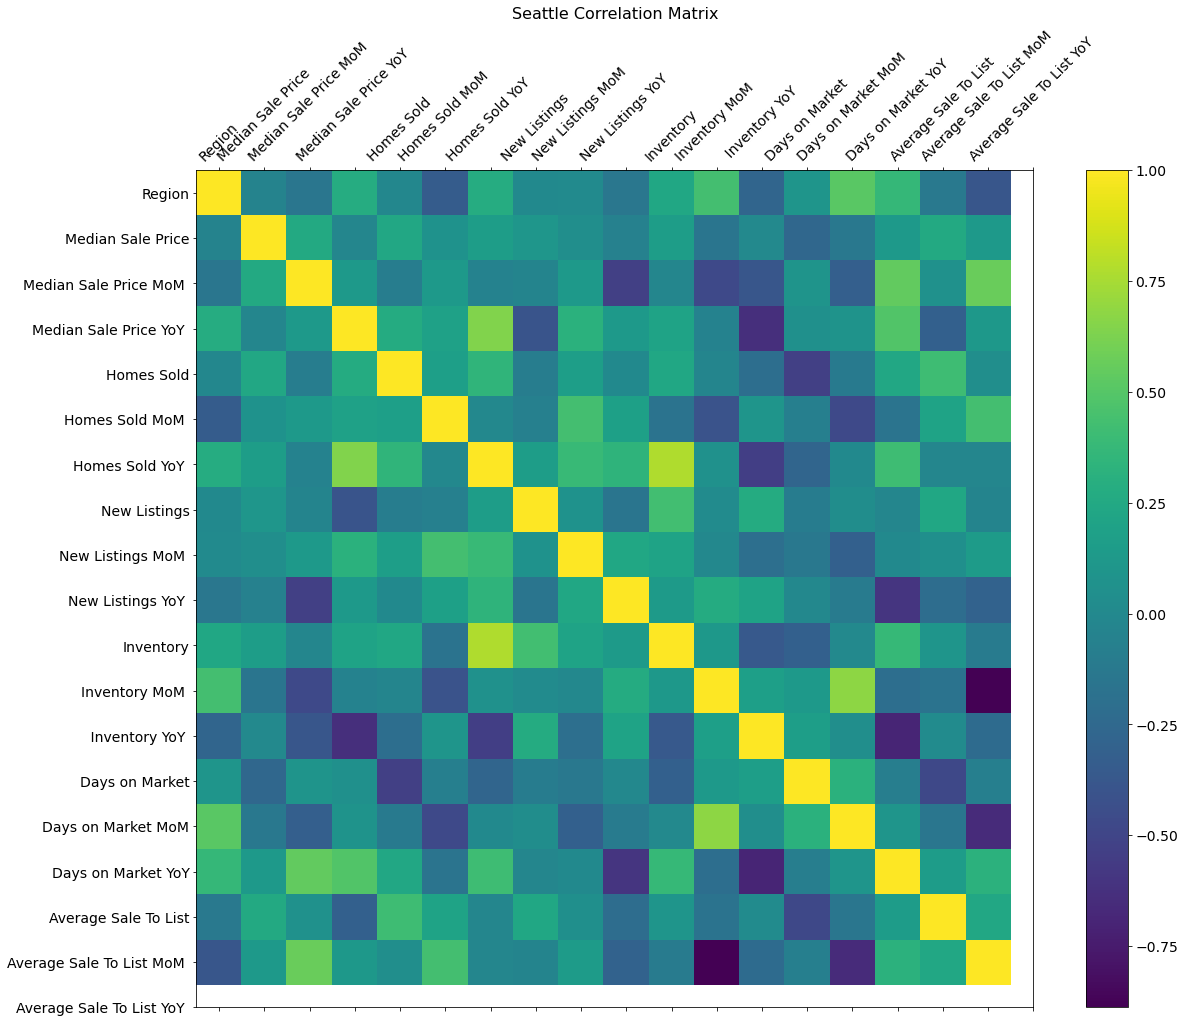

In [66]:
# Correlation Map for Seattle Data #1

seattle_corr = plt.figure(figsize=(19, 15))
plt.matshow(seattle_df.corr(), fignum=seattle_corr.number)
plt.xticks(range(seattle_df.shape[1]), seattle_df.columns, fontsize=14, rotation=45)
plt.yticks(range(seattle_df.shape[1]), seattle_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Seattle Correlation Matrix', fontsize=16)

In [67]:
# Correlation Map for Seattle Data #2
seattle_df.corr().style.background_gradient(cmap='coolwarm')
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html for color options

,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
Median Sale Price,1.000000,-0.045742,-0.149035,0.283413,-0.011550,-0.342316,0.278889,0.005394,0.012036,-0.140889,0.234800,0.433438,-0.271106,0.098617,0.513347,0.373056,-0.127482,-0.380721
Median Sale Price MoM,-0.045742,1.000000,0.261898,-0.020376,0.241455,0.071774,0.162232,0.100458,0.046433,-0.057987,0.166415,-0.151886,-0.001945,-0.260568,-0.134575,0.123633,0.260561,0.125776
Median Sale Price YoY,-0.149035,0.261898,1.000000,0.135452,-0.089502,0.125510,-0.048912,-0.035934,0.135199,-0.528416,-0.018300,-0.471349,-0.384530,0.090749,-0.312947,0.543721,0.063815,0.570355
Homes Sold,0.283413,-0.020376,0.135452,1.000000,0.274324,0.194786,0.640544,-0.400958,0.317887,0.131809,0.206458,-0.050710,-0.636993,0.059293,0.082924,0.487215,-0.312397,0.117794
Homes Sold MoM,-0.011550,0.241455,-0.089502,0.274324,1.000000,0.178239,0.348083,-0.088646,0.170219,0.004867,0.233076,-0.030686,-0.207429,-0.529980,-0.112950,0.241159,0.415263,0.045320
Homes Sold YoY,-0.342316,0.071774,0.125510,0.194786,0.178239,1.000000,-0.004414,-0.063277,0.432385,0.183139,-0.170007,-0.405482,0.095969,-0.073242,-0.468789,-0.160177,0.207160,0.437606
New Listings,0.278889,0.162232,-0.048912,0.640544,0.348083,-0.004414,1.000000,0.164968,0.381507,0.336261,0.773186,0.069081,-0.538598,-0.271996,0.010245,0.412000,-0.018452,-0.020421
New Listings MoM,0.005394,0.100458,-0.035934,-0.400958,-0.088646,-0.063277,0.164968,1.000000,0.077985,-0.156155,0.428199,0.026092,0.270991,-0.098755,0.037877,-0.018339,0.238775,-0.033977
New Listings YoY,0.012036,0.046433,0.135199,0.317887,0.170219,0.432385,0.381507,0.077985,1.000000,0.236355,0.205978,-0.005011,-0.197824,-0.130924,-0.308131,0.010881,0.054056,0.150908
Inventory,-0.140889,-0.057987,-0.528416,0.131809,0.004867,0.183139,0.336261,-0.156155,0.236355,1.000000,0.139690,0.273371,0.203805,-0.008187,-0.102285,-0.599326,-0.213452,-0.297804


Text(0.5, 1.0, 'Seattle Correlation Map')

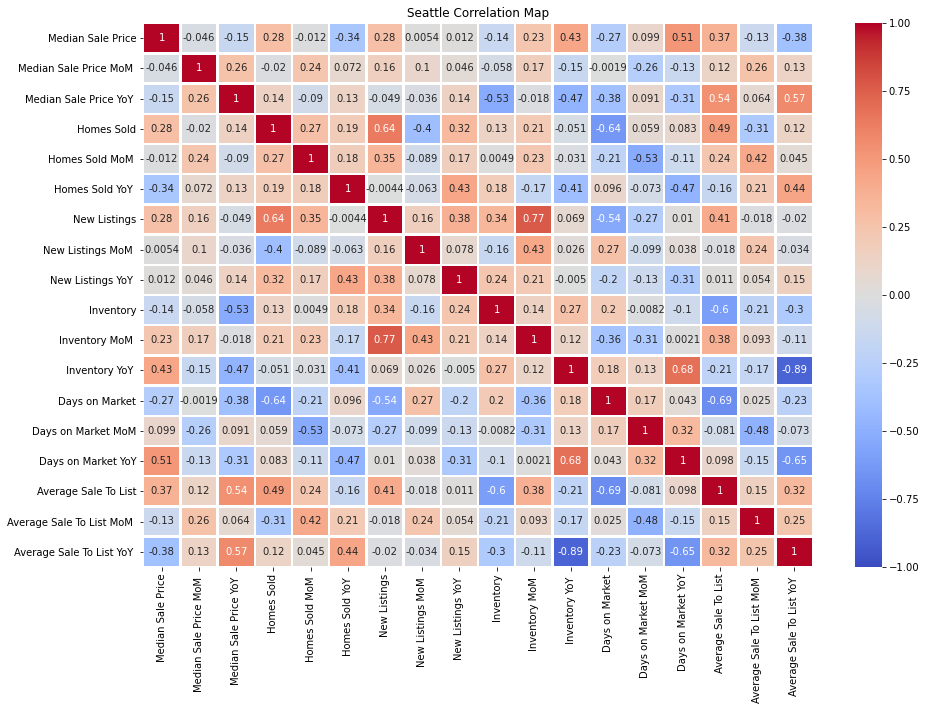

In [68]:
import seaborn as sns
# sns.heatmap(seattle_df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap="coolwarm", 
#             linecolor="black")

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(seattle_df.corr(), annot=True, linewidths=1.5, vmin=-1, vmax=1, ax=ax, 
            cmap="coolwarm").set_title("Seattle Correlation Map")

In [69]:
zip_codes = Path("Zip_Codes.csv")
zip_df = pd.read_csv(zip_codes)
zip_df.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,SHAPE_Length,SHAPE_Area
0,3,98033,98033,33,101363.84040,2.566747e+08
1,6,98027,98027,33,255232.06510,1.640576e+09
2,8,98039,98039,33,37222.72934,3.934682e+07
3,9,98040,98040,33,75519.64851,1.755842e+08
4,16,98052,98052,33,166796.78250,5.360575e+08


In [70]:
zip_df.dtypes

OBJECTID          int64
ZIP               int64
ZIPCODE           int64
COUNTY            int64
SHAPE_Length    float64
SHAPE_Area      float64
dtype: object

In [71]:
# fig = px.choropleth(zip_df, 
#                     locations="ZIP", 
#                     locationmode = "ISO-3", 
#                     color="ZIP", 
#                     hover_name="ZIP", 
#                     animation_frame="ZIP",
#                     width=800, height=600,
#                    )
# fig.update_layout(
#     title_text = 'Test',
#     title_x = 0.5,
#     geo=dict(
#         showframe = False,
#         showcoastlines = False,
#     )
# )
    
# fig.show()

In [72]:
# import json
# json.load(https://gisdata.seattle.gov/server/rest/services/COS/Seattle_City_Limits/MapServer/2/query?where=1%3D1&outFields=*&outSR=4326&f=json)

In [73]:
# Testing Linear Regression
linear_df = seattle_df

# linear = linear.groupby(["Month of Period End", "Region"]).sum()
linear_df["Return"] = linear_df["Median Sale Price"].pct_change() * 100
linear_df["Lagged"] = linear_df["Return"].shift()
linear_df = linear_df.dropna()
# linear_df.head()

In [74]:
X = linear_df["Lagged"].to_frame()
y = linear_df["Return"]

In [75]:
# Define new X and y for Logistic regression.  1 target value (y), 17 features values (X). 

# X = log_reg_df.copy()
# X.drop(columns=["Median Sale Price"], inplace=True)
# y = log_reg_df["Median Sale Price"]
# y = y.values.reshape(-1, 1)

In [76]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

print(y_train.shape)
print(y_test.shape)

(72,)
(31,)


In [77]:
# Use the MinMaxScaler to scale data between 0 and 1.
# scaler = MinMaxScaler()

# scaler.fit(X)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# scaler.fit(y)
# y_train_scaled = scaler.transform(y_train)
# y_test_scaled = scaler.transform(y_test)

In [78]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_train, y_train)

0.015688809798357295

In [79]:
predictions = model.predict(X_test)
results = pd.DataFrame({
    
    "Predictions":predictions,
    "Actual":y_test
}).reset_index(drop=True)

results.head()


,Predictions,Actual
0,1.000332,4.225352
1,0.679897,1.216216
2,1.043528,-3.204272
3,1.577709,-0.413793
4,1.240502,-6.509695


<AxesSubplot:>

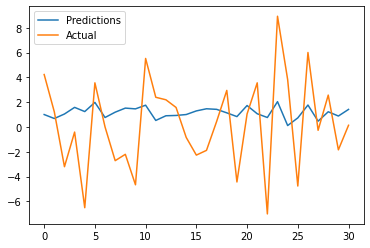

In [80]:
results.plot()

In [81]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 

mse = mean_squared_error(
    results["Actual"],
    results["Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 3.720685460072998


In [82]:
# Construct a DataFrame using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 3.5402224516965206


In [83]:
# Balanced Random Forest on Seattle only data

brf_df = seattle_df.reset_index()
brf_df = brf_df.set_index("Region")

In [84]:
brf_df['Month of Period End'] = pd.to_datetime(brf_df['Month of Period End'], 
                                               infer_datetime_format=True)

In [85]:
X = brf_df[["Homes Sold", "New Listings","Inventory", "Days on Market", "Average Sale To List" ]].copy()
y = brf_df["Median Sale Price"].ravel()
y[:5]

array([320, 350, 379, 380, 380], dtype=int64)

In [86]:
# X_train = X.iloc[:94,:] 
# X_test = X.iloc[95:,:]

# y_train = y[0:94]
# y_test = y[95::]

split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [90]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedRandomForestClassifier
scaler = StandardScaler().fit(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
# Creating Balanced Random Forest Model

brf = BalancedRandomForestClassifier(n_estimators=1000, random_state=1)
brf.fit(X_train_scaled, y_train)

predictions = brf.predict(X_test_scaled)

results = pd.DataFrame({
    
    "Predictions":predictions,
    "Actual":y_test
}).reset_index(drop=True)

results.tail()

,Predictions,Actual
27,405,742
28,405,740
29,405,759
30,405,745
31,429,746


<AxesSubplot:>

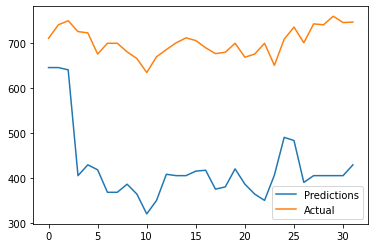

In [92]:
results.plot()

In [93]:
# Plotting against training data to see how model performs with data it saw. 

predictions = brf.predict(X_train_scaled)

results2 = pd.DataFrame({
    
    "Predictions":predictions,
    "Actual":y_train
}).reset_index(drop=True)

results2.tail()

,Predictions,Actual
68,655,655
69,675,675
70,667,667
71,700,700
72,699,699


<AxesSubplot:>

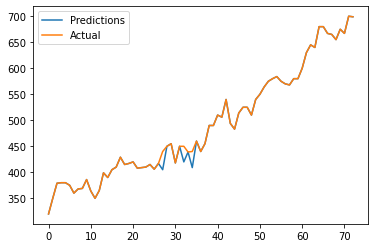

In [94]:
results2.plot()

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
importances = brf.feature_importances_

<AxesSubplot:title={'center':'Balanced Random Forest Features Importances'}, ylabel='1'>

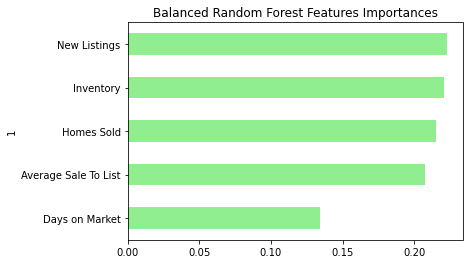

In [96]:
importances_df = pd.DataFrame(sorted(zip(brf.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', 
                        title= 'Balanced Random Forest Features Importances', legend=False)

In [97]:
# Creating Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
# from imblearn.ensemble import BalancedRandomForestClassifier
scaler = StandardScaler().fit(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(X_train_scaled, y_train)

predictions = rf.predict(X_test_scaled)

results = pd.DataFrame({
    
    "Predictions":predictions,
    "Actual":y_test
}).reset_index(drop=True)

results.tail()

,Predictions,Actual
27,405,742
28,405,740
29,405,759
30,490,745
31,417,746


<AxesSubplot:>

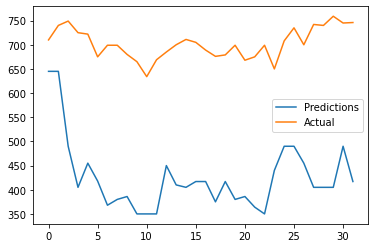

In [99]:
results.plot()

In [100]:
# Plotting against trained data to see performance / check for overfit. 
predictions = rf.predict(X_train_scaled)

results = pd.DataFrame({
    
    "Predictions":predictions,
    "Actual":y_train
}).reset_index(drop=True)

results.tail()

,Predictions,Actual
68,655,655
69,675,675
70,667,667
71,700,700
72,699,699


<AxesSubplot:>

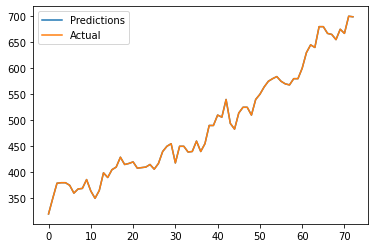

In [101]:
results.plot()

<AxesSubplot:title={'center':'Random Forest Features Importances'}, ylabel='1'>

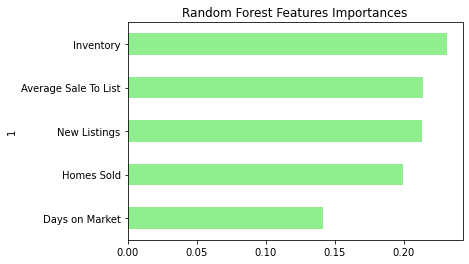

In [102]:
rf_importances_df = pd.DataFrame(sorted(zip(rf.feature_importances_, X.columns), reverse=True))
rf_importances_df.set_index(rf_importances_df[1], inplace=True)
rf_importances_df.drop(columns=1, inplace=True)
rf_importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
rf_importances_sorted = rf_importances_df.sort_values(by='Feature Importances')
rf_importances_sorted.plot(kind='barh', color='lightgreen', 
                           title= 'Random Forest Features Importances', legend=False)

In [103]:
# Testing PCA on Seattle Data
pca_df = seattle_df.reset_index()
pca_df = seattle_df.groupby(["Region", "Month of Period End"]).sum()

# Standardize data
seattle_scaled = StandardScaler().fit_transform(pca_df)
# print(seattle_scaled[0:5])

In [104]:
# Initialize PCA model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
pca = PCA(n_components=7)

# Get two principal components for the data.
seattle_pca = pca.fit_transform(seattle_scaled)


In [105]:
# Transform PCA data to a DataFrame
seattle_pca_df = pd.DataFrame(
    data=seattle_pca, 
    columns=["PC 1", "PC 2", "PC 3", "PC 4", "PC 5", "PC 6", "PC 7"])
seattle_pca_df.head()

pca.explained_variance_ratio_

array([0.21007622, 0.17164694, 0.12688573, 0.11458718, 0.0806696 ,
       0.06946129, 0.05203966])

In [106]:
# Initialize the K-Means model
model = KMeans(n_clusters=8, random_state=0)

# Fit the model
model.fit(seattle_pca_df)

# Predict clusters
predictions = model.predict(seattle_pca_df)

# Add the predicted class columns
seattle_pca_df["class"] = model.labels_
seattle_pca_df.head()


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,class
0,-1.077901,-1.917717,2.923238,-0.059637,-0.012397,-1.419600,2.553085,4
1,-1.541452,-0.822907,0.438191,2.172085,2.385918,0.112169,0.528928,0
2,-0.807186,0.186373,0.971014,-0.437752,-0.011525,-0.388592,0.075376,7
3,-3.141046,0.285466,0.577462,-1.009418,-0.976304,-0.637480,-0.095585,7
4,-1.928584,1.469408,-0.708615,-0.913197,1.022893,0.000978,0.730371,3


In [107]:
fig = px.scatter_3d(
    seattle_pca_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()